In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qcostas import generate_costas

def plot_costas(p):
    n = len(p)
    M = [[j + 1 == p[n - 1 - i] for j in range(n)] for i in range(n)]
    ax = plt.imshow(M, cmap="Greys", vmin=0, vmax=1).axes
    ax.set_xticks(range(n))
    ax.set_xticklabels(map(str, range(1, n + 1)))
    ax.set_yticks(range(n))
    ax.set_yticklabels(map(str, range(n, 0, -1)))
    ax.set_xticks([i - 0.5 for i in range(1, n)], minor=True)
    ax.set_yticks([i - 0.5 for i in range(1, n)], minor=True)
    ax.grid(which="minor", c="#ccc")

In [2]:
n = 3

permutation, details = generate_costas(n)
N = details["N"]
M = details["M"]
r = details["r"]
is_costas = details["is_costas"]
grover = details["grover"]
problem = details["problem"]
result = details["result"]

print("Found permutation:", permutation, "Costas?", is_costas)

Found permutation: [2, 3, 1] Costas? True


n=3, N=64, M=4, Grover iters≈3, classical avg≈16 guesses


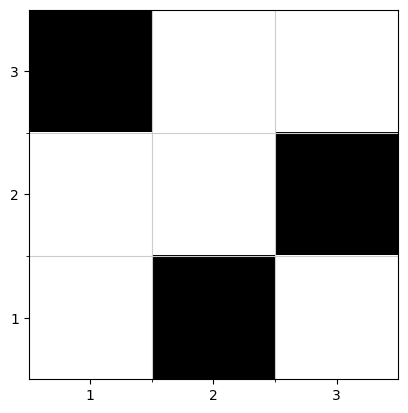

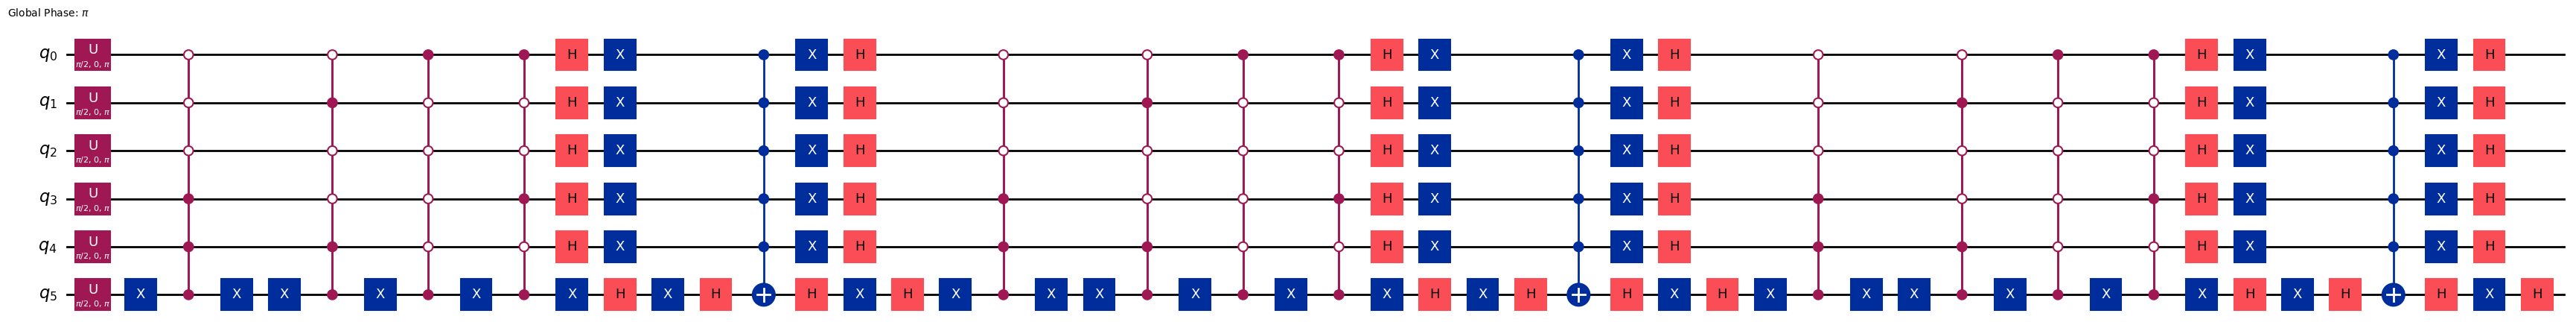

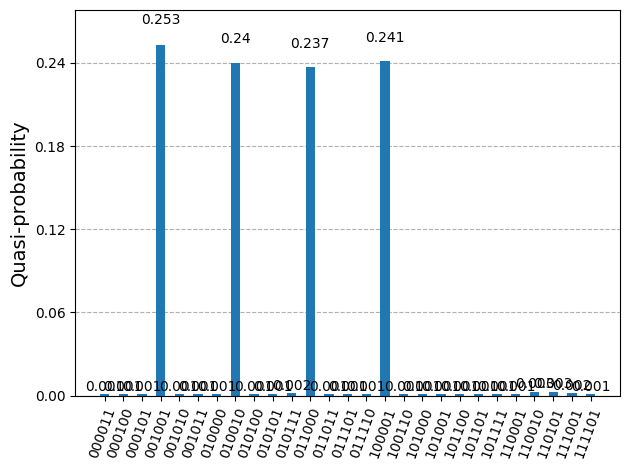

In [3]:
print(f"n={n}, N={N}, M={M}, Grover iters≈{r}, classical avg≈{N//M} guesses")

plot_costas(permutation)
grover.construct_circuit(problem=problem).decompose().decompose().draw("mpl", fold=-1)
plot_histogram(result.circuit_results)
plt.show()